In [1]:
import sys
import torch

sys.path.insert(0, "..")
basedir = "../.."

from common.config import create_object, load_config

%matplotlib widget

torch._dynamo.config.suppress_errors = True
torch._dynamo.disable()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# dconfig = load_config("../autoencoder/configs/data/burgersshift.yaml")
# dconfig.datasize.spacedim = 1
# dset = create_object(dconfig)

In [10]:
import models

dsets = ["droplettrigpoly1", "droplettrigpoly2"]
#mdls = ["aenet", "aenet-pp", "ti", "ltinet", "ldnet", "etinet", "eldnet"]
mdls = ["aenet-pp"]

epochs = 400 
for dname in dsets:
  dconfig = load_config(f"../autoencoder/configs/data/{dname}.yaml")
  dconfig.datasize.spacedim = 1
  dset = create_object(dconfig)

  for mdl in mdls:
    if mdl == "ti":
      config = load_config("../autoencoder/configs/experiments/ffnetnormal.yaml")
      experiment = models.TimeInputHelper(config)

      test = experiment.create_timeinput(dset, td=None, seed=0, device=device)
       
      test.train_model(epochs, lr=1e-3)

    elif mdl == "ltinet":
      config = load_config("../autoencoder/configs/experiments/ltinet.yaml")
      experiment = models.LTIHelper(config)

      test = experiment.create_ltinet(dset, td=None, seed=0, device=device)
       
      test.train_model(epochs, lr=1e-3)

    elif mdl == "ldnet":
      config = load_config("../autoencoder/configs/experiments/ldnet.yaml")
      experiment = models.LDHelper(config)

      test = experiment.create_ldnet(dset, 8, td=None, seed=0, device=device)
      print(test.device)

      test.train_model(epochs, lr=1e-3)

    elif mdl == "aenet":
      config = load_config("../autoencoder/configs/experiments/weldnormal.yaml")
      experiment = models.WeldHelper(config)

      test = experiment.create_weld(dset, windows=1, k=10, td=None, seed=0, device=device, accumulateprop=True)
      print(test.device)

      test.train_aes_plus_props(epochs, lr=1e-3)
      test.train_propagators(epochs // 2, lr=1e-4)
      test.save_models()
    
    elif mdl == "aenet-pp":
      config = load_config("../autoencoder/configs/experiments/weldnormal.yaml")
      experiment = models.WeldHelper(config)

      test = experiment.create_weld(dset, windows=1, k=8, td=None, seed=0, device=device, passparams=True, accumulateprop=True)
      print(test.device)

      test.train_aes_plus_props(epochs, lr=1e-3)
      test.train_propagators(epochs // 2, lr=1e-4)
      test.save_models()

    elif mdl == "etinet":
      config = load_config("../autoencoder/configs/experiments/etinet.yaml")
      experiment = models.ETIHelper(config)

      test = experiment.create_etinet(dset, 10, td=None, seed=0, device=device)
      print(test.device)

      test.train_aenet(epochs, lr=1e-3)
      test.train_recnet(epochs, lr=1e-3)

    elif mdl == "eldnet":
      config = load_config("../autoencoder/configs/experiments/eldnet.yaml")
      experiment = models.ELDHelper(config)

      test = experiment.create_eldnet(dset, 3, 7, td=None, seed=0, device=device)
      print(test.device)

      test.train_aenet(epochs, lr=1e-3)
      test.train_ldnet(epochs, lr=1e-3)
    

cuda
Training 1 WeldNet AEs and props together
Number of NN trainable parameters 1313309
Starting training WeldNet AE + Prop 1/1 (0->100) at Wed Jul 23 17:31:42 2025...
train torch.Size([200, 101, 303]) test (50, 101, 303)
1: Train Loss 1.426e-02 + 6.178e-05, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.241118, 0.315920, 0.647967
11: Train Loss 9.171e-03 + 3.824e-06, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.192645, 0.277539, 0.579568
21: Train Loss 6.564e-03 + 1.272e-04, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.147435, 0.207485, 0.527763
31: Train Loss 3.271e-03 + 1.055e-04, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.097147, 0.139309, 0.401467
41: Train Loss 1.398e-03 + 6.871e-05, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.081078, 0.111963, 0.329950
51: Train Loss 6.833e-04 + 3.165e-05, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.063675, 0.087543, 0.268217
61: Train Loss 4.849e-04 + 3.202e-05, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.058979, 0.079660, 0.2

c:\Users\Admin\Anaconda3\envs\das\lib\site-packages\torch\utils\_device.py:106: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


1: Train Loss 2.069e-01, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 0.716481, 0.805374, 0.867648
11: Train Loss 9.782e-03, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 0.275113, 0.325714, 0.384088
21: Train Loss 6.637e-03, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 0.215783, 0.251072, 0.281051
31: Train Loss 4.139e-03, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 0.197452, 0.227445, 0.258798
41: Train Loss 2.937e-03, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 0.207656, 0.228231, 0.247073
51: Train Loss 2.784e-03, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 0.176487, 0.203403, 0.228822
61: Train Loss 2.643e-03, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 0.174355, 0.200496, 0.222817
71: Train Loss 2.754e-03, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 0.208415, 0.231909, 0.247297
81: Train Loss 1.663e-03, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 0.176994, 0.201800, 0.221299
91: Train Loss 2.308e-03, LR 

c:\Users\Admin\Anaconda3\envs\das\lib\site-packages\torch\utils\_device.py:106: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


1: Train Loss 1.495e-03, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 0.326617, 0.357831, 0.360377
11: Train Loss 1.257e-04, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 0.073371, 0.073007, 0.065123
21: Train Loss 7.097e-05, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 0.063917, 0.062873, 0.055570
31: Train Loss 6.052e-05, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 0.060966, 0.060519, 0.054465
41: Train Loss 5.306e-05, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 0.055874, 0.055340, 0.049653
51: Train Loss 4.937e-05, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 0.051428, 0.050739, 0.044670
61: Train Loss 5.437e-04, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 0.082389, 0.084083, 0.078255
71: Train Loss 1.209e-04, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 0.086077, 0.088204, 0.086748
81: Train Loss 8.225e-05, LR 3.000e-05, Relative Propagator Error (1, 2, inf): 0.064935, 0.067438, 0.065277
91: Train Loss 5.118e-05, LR 

In [12]:
# load
dconfig = load_config(f"../autoencoder/configs/data/droplettrigpoly1.yaml")
dconfig.datasize.spacedim = 1
dset = create_object(dconfig)

In [15]:
import models
import utils
import numpy as np

mdl = "aenet"

if mdl == "ti":
  config = load_config("../autoencoder/configs/experiments/ffnetnormal.yaml")
  experiment = models.TimeInputHelper(config)

  test = experiment.create_timeinput(dset, td=None, seed=0, device=device)
    
  test.load_model("")

  operrs = models.TimeInputHelper.get_operrs(test, testonly=True)
  print("Avg", np.mean(operrs), "Final", operrs[-1])
  print(utils.num_params(test.model))


elif mdl == "ltinet":
  config = load_config("../autoencoder/configs/experiments/ltinet.yaml")
  experiment = models.LTIHelper(config)

  test = experiment.create_ltinet(dset, td=None, seed=0, device=device)
    
  test.load_model("")

  operrs = models.LTIHelper.get_operrs(test, testonly=True)
  print("Avg", np.mean(operrs), "Final", operrs[-1])
  print(utils.num_params(test.recnet))

elif mdl == "ldnet":
  config = load_config("../autoencoder/configs/experiments/ldnet.yaml")
  experiment = models.LDHelper(config)

  test = experiment.create_ldnet(dset, 8, td=None, seed=0, device=device)
  print(test.device)

  test.load_model("")

  operrs = models.LDHelper.get_operrs(test, testonly=True)
  print("Avg", np.mean(operrs), "Final", operrs[-1])
  print(utils.num_params(test.recnet) + utils.num_params(test.dynnet))

elif mdl == "aenet":
  config = load_config("../autoencoder/configs/experiments/weldnormal.yaml")
  experiment = models.WeldHelper(config)

  test = experiment.create_weld(dset, windows=1, k=10, td=None, seed=0, device=device, accumulateprop=True)
  test.metadata["trainedtogether"] = True

  test.load_models("", together=True)
    
  projerrs = models.WeldHelper.get_projerr_times(test, testonly=True)
  print("Avg AE", np.mean(projerrs), "Final AE", projerrs[-1])

  operrs = models.WeldHelper.get_operrs(test, testonly=True)
  print("Avg", np.mean(operrs), "Final", operrs[-1])
  print(utils.num_params(test.aes[0]) + utils.num_params(test.props[0]))

elif mdl == "aenet-pp":
  config = load_config("../autoencoder/configs/experiments/weldnormal.yaml")
  experiment = models.WeldHelper(config)

  test = experiment.create_weld(dset, windows=1, k=8, td=None, seed=0, device=device, passparams=True, accumulateprop=True)
  test.metadata["trainedtogether"] = True

  test.load_models("", together=True)

  projerrs = models.WeldHelper.get_projerr_times(test, testonly=True)
  print("Avg AE", np.mean(projerrs), "Final AE", projerrs[-1])

  operrs = models.WeldHelper.get_operrs(test, testonly=True)
  print("Avg", np.mean(operrs), "Final", operrs[-1])
  print(utils.num_params(test.aes[0]) + utils.num_params(test.props[0]))

elif mdl == "etinet":
  config = load_config("../autoencoder/configs/experiments/etinet.yaml")
  experiment = models.ETIHelper(config)

  test = experiment.create_etinet(dset, 10, td=None, seed=0, device=device)
  print(test.device)

  test.load_models("")

  operrs = models.ETIHelper.get_operrs(test, testonly=True)
  print("Avg", np.mean(operrs), "Final", operrs[-1])
  print(utils.num_params(test.aenet) + utils.num_params(test.recnet))

elif mdl == "eldnet":
  config = load_config("../autoencoder/configs/experiments/eldnet.yaml")
  experiment = models.ELDHelper(config)

  test = experiment.create_eldnet(dset, 3, 7, td=None, seed=0, device=device)
  print(test.device)

  test.load_models("")

  operrs = models.ELDHelper.get_operrs(test, testonly=True)
  print("Avg", np.mean(operrs), "Final", operrs[-1])
  print(utils.num_params(test.aenet) + utils.num_params(test.recnet) + utils.num_params(test.dynnet))

print()
print("Time taken", test.timetaken)

Searching for model files matching prefix: 
Model match found. Loading from: savedmodels/weldtogether\dtrigpoly1_FFAutoencoder_1314311_186910_0_0_400ep_2025-07-23_17-19-12.pickle
Avg AE 0.033204235 Final AE 0.09711529
Avg 0.04659431 Final 0.12434974
1501221

Time taken 159.52438116073608


c:\Users\Admin\Anaconda3\envs\das\lib\site-packages\torch\utils\_device.py:106: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


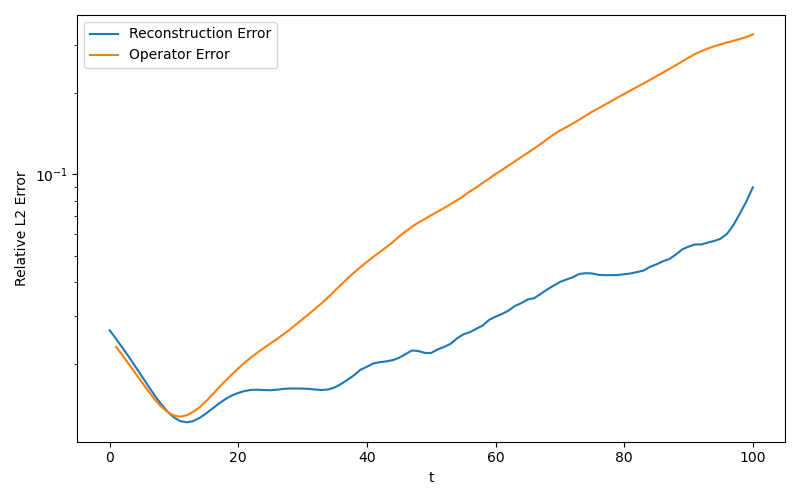

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

In [8]:
models.WeldHelper.plot_projops(test)

Average Relative L2 Error over all times: 0.0547


interactive(children=(IntSlider(value=0, description='i', max=49), IntSlider(value=1, description='s', min=1),…

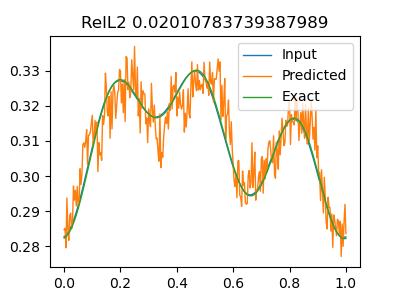

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

In [4]:
models.ELDHelper.plot_op_predicts(test, testonly=True)

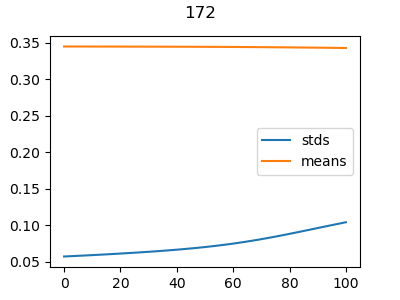

In [9]:
import numpy as np
import matplotlib.pyplot as plt

data = dset.data
means = np.mean(data, axis=2)
stds = np.std(data, axis=2)

i = np.random.randint(means.shape[0])

fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(stds[i], label="stds")
ax.plot(means[i], label="means")
fig.suptitle(i)
ax.legend()

In [ ]:
models.ETINetHelper.plot_op_predicts(test)

In [ ]:
dconfig = load_config("../autoencoder/configs/data/droplettrigpoly2.yaml")
dconfig.datasize.spacedim = 1
dconfig.datasize.scaledown=False
dset = create_object(dconfig)

#dset.downsample_time(10)
#dset.downsample(4)

interactive(children=(IntSlider(value=0, description='t0'), IntSlider(value=0, description='t1'), FloatSlider(…

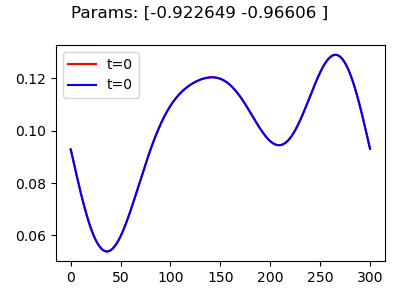

AttributeError: 'Canvas' object has no attribute 'key_press_event'

AttributeError: 'Canvas' object has no attribute 'key_press_event'

AttributeError: 'Canvas' object has no attribute 'key_release_event'

AttributeError: 'Canvas' object has no attribute 'key_release_event'

In [ ]:
dset.plot_data(mode="params")

In [ ]:
import time
import glob
import datetime
import copy
import os
import pickle
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
import matplotlib.cm as cm

import itertools

from itertools import combinations
from sklearn.decomposition import PCA
from sklearn.kernel_ridge import KernelRidge
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader
from torch.optim import lr_scheduler
from copy import deepcopy

import utils

class ELDNetHelper():
  def __init__(self, config):
    self.update_config(config)

  def update_config(self, config):
    self.config = deepcopy(config)

  def create_eldnet(self, dataset, f, k, config=None, **args):
    if config is None:
      config = self.config

    assert(len(dataset.data.shape) < 4)
    if len(dataset.data.shape) == 3:
      dout = dataset.data.shape[-1]

    td = args.get("td", None)
    seed = args.get("seed", 0)
    device = args.get("device", 0)

    aeclass = globals()[args.get("aeclass", config.aeclass)]
    aeparams = copy.deepcopy(dict(args.get("aeparams", config.aeparams)))
    dynclass = globals()[args.get("dynclass", config.dynclass)]
    dynparams = copy.deepcopy(dict(args.get("dynparams", config.dynparams)))
    decclass = globals()[args.get("decclass", config.decclass)]
    recparams = copy.deepcopy(dict(args.get("recparams", config.recparams)))

    dynparams["seq"][0] = k + f
    dynparams["seq"][-1] = k
    recparams["seq"][0] = k + f
    recparams["seq"][-1] = dout

    return ELDNet(dataset, f, k, aeclass, aeparams, dynclass, dynparams, decclass, recparams, td=td, seed=seed, device=device)

  @staticmethod
  def get_operrs(ldnet, times=None, testonly=False):
    if testonly:
      data = ldnet.dataset.data[ldnet.numtrain:,]
    else:
      data = ldnet.dataset.data

    errors = ldnet.get_errors(data, times=times, aggregate=False)

    return errors
  
  @staticmethod
  def plot_op_predicts(ldnet, testonly=False, xs=None, cmap="viridis"):
    if testonly:
      data = ldnet.dataset.data[ldnet.numtrain:,]
      params = ldnet.dataset.params[ldnet.numtrain:,]
    else:
      data = ldnet.dataset.data
      params = ldnet.dataset.params

    if xs == None:
      xs = np.linspace(0, 1, len(data[0, 0]))

    params = torch.tensor(np.float32(params)).to(ldnet.device)

    predicts = ldnet.propagate(params).cpu().detach()

    errors = []
    n = predicts.shape[0]
    for s in range(data.shape[1]):
      currpredict = predicts[:, s-1].reshape((n, -1))
      currreference = data[:, s].reshape((n, -1))
      errors.append(np.mean(np.linalg.norm(currpredict - currreference, axis=1) / np.linalg.norm(currreference, axis=1)))
        
    print(f"Average Relative L2 Error over all times: {np.mean(errors):.4f}")

    if len(data.shape) == 3:
      fig, ax = plt.subplots(figsize=(4, 3))

    @widgets.interact(i=(0, n-1), s=(1, ldnet.T-1))
    def plot_interact(i=0, s=1):
      print(f"Avg Relative L2 Error for t0 to t{s}: {errors[s-1]:.4f}")

      if len(data.shape) == 3:
        ax.clear()
        ax.set_title(f"RelL2 {np.linalg.norm(predicts[i, s-1] - data[i, s]) / np.linalg.norm(data[i, s])}")
        ax.plot(xs, data[i, 0], label="Input", linewidth=1)
        ax.plot(xs, predicts[i, s-1], label="Predicted", linewidth=1)
        ax.plot(xs, data[i, s], label="Exact", linewidth=1)
        ax.legend()
        
  @staticmethod
  def plot_errorparams(ldnet, param=-1):
    if param == -1:
        # Auto-detect one varying parameter
        param = 0
        P = ldnet.dataset.params.shape[1]
        for p in range(P):
            if np.abs(ldnet.dataset.params[0, p] - ldnet.dataset.params[1, p]) > 0:
                param = p
                break

    l2error = np.asarray(LDHelper.get_operrs(ldnet, times=[ldnet.T - 1]))
    params = ldnet.dataset.params

    print(params.shape, l2error.shape)

    if isinstance(param, (list, tuple, np.ndarray)) and len(param) == 2:
        # 3D scatter plot for 2 varying parameters
        x = params[:, param[0]]
        y = params[:, param[1]]
        z = l2error

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        sc = ax.scatter(x, y, z, c=z, cmap='viridis', s=10)

        ax.set_xlabel(f"Param {param[0]}")
        ax.set_ylabel(f"Param {param[1]}")
        ax.set_zlabel("Operator Error")
        fig.colorbar(sc, ax=ax, label="Operator Error")

    else:
        # Fallback to 2D scatter if param is 1D
        fig, ax = plt.subplots()
        ax.scatter(params[:, param], l2error, s=2)
        ax.set_xlabel(f"Parameter {param}")
        ax.set_ylabel("Operator Error")

    fig.tight_layout()

class ELDNet():
  def __init__(self, dataset, f, k, aeclass, aeparams, dynclass, dynparams, decclass, recparams, td, seed, device):
    self.dataset = dataset
    self.device = device
    self.td = td
    self.k = k
    self.f = f
  
    if self.td is None:
      self.prefix = f"{self.dataset.name}{str(dynclass.__name__)}ELDNet-{self.k+self.f}"
    else:
      self.prefix = self.td

    torch.manual_seed(seed)
    np.random.seed(seed)
    self.seed = seed

    datacopy = self.dataset.data.copy()
    self.numtrain = int(datacopy.shape[0] * 0.8)
    
    self.T = self.dataset.data.shape[1]
    self.trainarr = datacopy[:self.numtrain]
    self.testarr = datacopy[self.numtrain:]
    self.optparams = None

    self.datadim = len(self.dataset.data.shape) - 2

    self.aeclass = aeclass
    self.aeparams = copy.deepcopy(aeparams)
    self.dynclass = dynclass
    self.dynparams = copy.deepcopy(dynparams)
    self.decclass = decclass
    self.recparams = copy.deepcopy(recparams)

    aeparams["encodeSeq"][0] = self.dataset.data.shape[-1]
    aeparams["encodeSeq"][-1] = self.f
    aeparams["decodeSeq"][0] = self.f
    aeparams["decodeSeq"][-1] = self.dataset.data.shape[-1]

    dynparams["seq"][0] = self.k + self.f
    dynparams["seq"][-1] = self.k
    recparams["seq"][0] = self.k + self.f
    recparams["seq"][-1] = self.dataset.data.shape[-1]

    self.aenet = aeclass(**aeparams).float().to(device)
    self.dynnet = dynclass(**dynparams).float().to(device)
    self.recnet = decclass(**recparams).float().to(device)

    self.metadata = {
      "aeclass": aeclass.__name__,
      "aeparams": aeparams,
      "dynclass": dynclass.__name__,
      "dynparams": dynparams,
      "decclass": decclass.__name__,
      "recparams": recparams,
      "dataset_name": dataset.name,
      "data_shape": list(dataset.data.shape),
      "data_checksum": float(np.sum(dataset.data)),
      "seed": seed,
      "epochs": []
    }

  def propagate(self, code, start=0, end=-1, returncodes=False):
    if end == -1:
      end = self.T - 1

    z = code

    # get first decode
    if z.shape[-1] != self.f + self.k:
      if z.shape[-1] == self.f:
        z_fixed = z
        z_dynamic = torch.zeros(list(z_fixed.shape[:-1]) + [self.k])
        z = torch.cat([z_fixed, z_dynamic], dim=-1)
      else:
        print(z.shape)
        assert(False)

    zpreds = [z]
    for t in range(start, end):
      z = self.forward(z)
      zpreds.append(z)

    zpreds = torch.stack(zpreds, dim=1)
    upreds = self.recnet(zpreds)

    if returncodes:
      return upreds, zpreds
    else:
      return upreds
     
  def get_ae_errors(self, testarr, ords=(2,)):
    if isinstance(testarr, np.ndarray):
      testarr = torch.tensor(testarr, dtype=torch.float32)
  
    out = self.aenet(testarr).cpu().detach().numpy()
    orig = testarr.cpu().detach().numpy()

    testerrs = []
    for o in ords:
      testerrs.append(np.mean(np.linalg.norm(orig - out, axis=1, ord=o) / np.linalg.norm(orig, axis=1, ord=o)))

    return tuple(testerrs)

  def get_errors(self, testarr, testparams, ords=(2,), times=None, aggregate=True):
    assert(aggregate or len(ords) == 1)
    
    if isinstance(testarr, np.ndarray):
      testarr = torch.tensor(testarr, dtype=torch.float32)

    if isinstance(testparams, np.ndarray):
      testparams = torch.tensor(testparams, dtype=torch.float32)

    if times is None:
      times = range(self.T-1)
  
    out = self.propagate(testparams)

    n = testarr.shape[0]
    orig = testarr.cpu().detach().numpy()
    out = out.cpu().detach().numpy()

    if aggregate:
      orig = orig.reshape([n, -1])
      out = out.reshape([n, -1])
      testerrs = []
      for o in ords:
        testerrs.append(np.mean(np.linalg.norm(orig - out, axis=1, ord=o) / np.linalg.norm(orig, axis=1, ord=o)))

      return tuple(testerrs)
    
    else:
      o = ords[0]
      testerrs = []

      if len(times) == 1:
        t = times[0]
        origslice = orig[:, t].reshape([n, -1])
        outslice = out[:, t].reshape([n, -1])
        return np.linalg.norm(origslice - outslice, axis=1, ord=o) / np.linalg.norm(origslice, axis=1, ord=o)
      else:
        for t in range(orig.shape[1]):
          origslice = orig[:, t].reshape([n, -1])
          outslice = out[:, t].reshape([n, -1])
          testerrs.append(np.mean(np.linalg.norm(origslice - outslice, axis=1, ord=o) / np.linalg.norm(origslice, axis=1, ord=o)))

        return testerrs

  def forward(self, z_full, decode=False):
    if z_full.shape[-1] == self.f + self.k:
      z_fixed = z_full[..., :self.f]
      z_dynamic = z_full[..., self.f:]

    else:
      if z_full.shape[-1] == self.f:
        z_fixed = z_full
        z_dynamic = torch.zeros(list(z_fixed.shape[:-1]) + [self.k])
        z_full = torch.cat([z_fixed, z_dynamic], dim=-1)
      else:
        print(z_full.shape)
        assert(False)

    deltaz = self.dynnet(z_full)
    z_next_dynamic = z_dynamic + deltaz
    z_next_full = torch.cat([z_fixed, z_next_dynamic], dim=-1)

    if decode:
      decoded = self.recnet(z_next_full)
      return decoded, z_next_full
    
    else:
      return z_next_full

  def load_models(self, filename_prefix, verbose=False, min_epochs=0):
    search_path = f"savedmodels/eldnet/{filename_prefix}*.pickle"
    matching_files = glob.glob(search_path)

    print("Searching for model files matching prefix:", filename_prefix)
    if not hasattr(self, "metadata"):
        raise ValueError("Missing self.metadata. Cannot match models without metadata. Ensure model has been initialized with same config.")

    for addr in matching_files:
      try:
          with open(addr, "rb") as handle:
              dic = pickle.load(handle)
      except Exception as e:
          if verbose:
              print(f"Skipping {addr} due to read error: {e}")
          continue

      meta = dic.get("metadata", {})
      is_match = all(
          meta.get(k) == self.metadata.get(k)
          for k in self.metadata.keys()
      )

      # Check if model meets the minimum epoch requirement
      model_epochs = meta.get("epochs")
      if model_epochs is None:
          if verbose:
              print(f"Skipping {addr} due to missing epoch metadata.")
          continue
      elif isinstance(model_epochs, list):  # handle legacy or list format
          if sum(model_epochs) < min_epochs:
              if verbose:
                  print(f"Skipping {addr} due to insufficient epochs ({sum(model_epochs)} < {min_epochs})")
              continue
      elif model_epochs < min_epochs:
          if verbose:
              print(f"Skipping {addr} due to insufficient epochs ({model_epochs} < {min_epochs})")
          continue

      if is_match:
          print("Model match found. Loading from:", addr)
          self.dynnet.load_state_dict(dic["dynnet"])
          self.recnet.load_state_dict(dic["recnet"])
          self.metadata["epochs"] = meta.get("epochs")
          if "opt" in dic:     
            self.optparams = dic["opt"]

          return True
      elif verbose:
          print("Metadata mismatch in file:", addr)
          for k in self.metadata:
              print(f"{k}: saved={meta.get(k)} vs current={self.metadata.get(k)}")

    print("Load failed. No matching models found.")
    print("Searched:", matching_files)
    return False

  def train_aenet(self, epochs, optim=torch.optim.AdamW, lr=1e-4, printinterval=10, batch=32, ridge=0, loss=None, best=True, verbose=False):
    def aenet_epoch(dataloader, writer=None, optimizer=None, scheduler=None, ep=0, printinterval=10, loss=None, testarr=None):
      losses = []
      testerrors1 = []
      testerrors2 = []
      testerrorsinf = []

      def closure(codes):
        optimizer.zero_grad()

        out = self.aenet(codes)
        target = codes
        
        res = loss(out, target)
        res.backward()
        
        if writer is not None and self.aestep % 5 == 0:
          writer.add_scalar("main/aeloss", res, global_step=self.aestep)

        return res

      for codes in dataloader:
        self.aestep += 1
        error = optimizer.step(lambda: closure(codes))
        losses.append(float(error.cpu().detach()))

      if scheduler is not None:
        scheduler.step(np.mean(losses))

      # print test
      if printinterval > 0 and (ep % printinterval == 0):
        testerr1, testerr2, testerrinf = self.get_ae_errors(testarr, ords=(1, 2, np.inf))
        if scheduler is not None:
          print(f"{ep+1}: Train Loss {error:.3e}, LR {scheduler.get_last_lr()[-1]:.3e}, Relative ELDNet AE Error (1, 2, inf): {testerr1:3f}, {testerr2:3f}, {testerrinf:3f}")
        else:
          print(f"{ep+1}: Train Loss {error:.3e}, Relative ELDNet AE Error (1, 2, inf): {testerr1:3f}, {testerr2:3f}, {testerrinf:3f}")

        if writer is not None:
            writer.add_scalar("misc/relativeL1error", testerr1, global_step=ep)
            writer.add_scalar("main/relativeL2error", testerr2, global_step=ep)
            writer.add_scalar("misc/relativeLInferror", testerrinf, global_step=ep)

      return losses, testerrors1, testerrors2, testerrorsinf
  
    self.aestep = 0
    loss = nn.MSELoss() if loss is None else loss()

    losses, testerrors1, testerrors2, testerrorsinf = [], [], [], []

    initial = torch.tensor(self.trainarr[:, 0], dtype=torch.float32).to(self.device)
    test = torch.tensor(self.testarr[:, 0], dtype=torch.float32).to(self.device)

    opt = optim(self.aenet.parameters(), lr=lr, weight_decay=ridge)
    scheduler = lr_scheduler.ReduceLROnPlateau(opt, patience=30)
    dataloader = DataLoader(initial, shuffle=False, batch_size=batch)

    if self.optparams is not None:
      opt.load_state_dict(self.optparams)

    writer = None
    if self.td is not None:
      name = f"./tensorboard/{datetime.datetime.now().strftime('%d-%B-%Y')}/{self.td}/{datetime.datetime.now().strftime('%H.%M.%S')}/"
      writer = torch.utils.tensorboard.SummaryWriter(name)
      print("Tensorboard writer location is " + name)

    print("Number of NN trainable parameters", utils.num_params(self.aenet))
    print(f"Starting training ELDNet AE model at {time.asctime()}...")
    print("train", initial.shape, "test", test.shape)
      
    bestdict = { "loss": float(np.inf), "ep": 0 }
    for ep in range(epochs):
      lossesN, testerrors1N, testerrors2N, testerrorsinfN = aenet_epoch(dataloader, optimizer=opt, scheduler=scheduler, writer=writer, ep=ep, printinterval=printinterval, loss=loss, testarr=test)
      losses += lossesN; testerrors1 += testerrors1N; testerrors2 += testerrors2N; testerrorsinf += testerrorsinfN

      if best and ep > epochs // 2:
        avgloss = np.mean(lossesN)
        if avgloss < bestdict["loss"]:
          bestdict["aenet"] = self.aenet.state_dict()
          bestdict["opt"] = opt.state_dict()
          bestdict["loss"] = avgloss
          bestdict["ep"] = ep
        elif verbose:
          print(f"Loss not improved at epoch {ep} (Ratio: {avgloss/bestdict['loss']:.2f}) from {bestdict['ep']} (Loss: {bestdict['loss']:.2e})")
      
    print(f"Finished training ELDNet AE model at {time.asctime()}...")

    if best:
      self.aenet.load_state_dict(bestdict["aenet"])
      opt.load_state_dict(bestdict["opt"])

    return { "losses": losses, "testerrors1": testerrors1, "testerrors2": testerrors2, "testerrorsinf": testerrorsinf }

  def train_ldnet(self, epochs, save=True, optim=torch.optim.AdamW, lr=1e-4, printinterval=10, batch=32, ridge=0, loss=None, best=True, verbose=False):
    def train_epoch(dataloader, writer=None, optimizer=None, scheduler=None, ep=0, printinterval=10, loss=None, testarr=None, testparams=None):
      losses = []
      testerrors1 = []
      testerrors2 = []
      testerrorsinf = []

      def closure(values, params):
        optimizer.zero_grad()

        out = self.propagate(params)
        target = values
        
        res = loss(out, target)
        res.backward()
        
        if writer is not None and self.trainstep % 5 == 0:
          writer.add_scalar("main/loss", res, global_step=self.trainstep)

        return res

      for values, params in dataloader:
        self.trainstep += 1
        error = optimizer.step(lambda: closure(values, params))
        losses.append(float(error.cpu().detach()))

      if scheduler is not None:
        scheduler.step(np.mean(losses))

      # print test
      if printinterval > 0 and (ep % printinterval == 0):
        testerr1, testerr2, testerrinf = self.get_errors(testarr, testparams, ords=(1, 2, np.inf))
        if scheduler is not None:
          print(f"{ep+1}: Train Loss {error:.3e}, LR {scheduler.get_last_lr()[-1]:.3e}, Relative LDNet Error (1, 2, inf): {testerr1:3f}, {testerr2:3f}, {testerrinf:3f}")
        else:
          print(f"{ep+1}: Train Loss {error:.3e}, Relative LDNet Error (1, 2, inf): {testerr1:3f}, {testerr2:3f}, {testerrinf:3f}")

        if writer is not None:
            writer.add_scalar("misc/relativeL1error", testerr1, global_step=ep)
            writer.add_scalar("main/relativeL2error", testerr2, global_step=ep)
            writer.add_scalar("misc/relativeLInferror", testerrinf, global_step=ep)

      return losses, testerrors1, testerrors2, testerrorsinf
  
    loss = nn.MSELoss() if loss is None else loss()

    losses, testerrors1, testerrors2, testerrorsinf = [], [], [], []
    self.trainstep = 0

    train = torch.tensor(self.trainarr, dtype=torch.float32).to(self.device)
    params = self.aenet.encode(train[:, 0]).detach()

    test = torch.tensor(self.testarr, dtype=torch.float32).to(self.device)
    testparams = self.aenet.encode(test[:, 0]).detach()

    opt = optim(itertools.chain(self.dynnet.parameters(), self.recnet.parameters()), lr=lr, weight_decay=ridge)
    scheduler = lr_scheduler.ReduceLROnPlateau(opt, patience=30)
    dataloader = DataLoader(torch.utils.data.TensorDataset(train, params), shuffle=False, batch_size=batch)

    if self.optparams is not None:
      opt.load_state_dict(self.optparams)

    writer = None
    if self.td is not None:
      name = f"./tensorboard/{datetime.datetime.now().strftime('%d-%B-%Y')}/{self.td}/{datetime.datetime.now().strftime('%H.%M.%S')}/"
      writer = torch.utils.tensorboard.SummaryWriter(name)
      print("Tensorboard writer location is " + name)

    print("Number of NN trainable parameters", utils.num_params(self.dynnet), "+", utils.num_params(self.recnet))
    print(f"Starting training ELDNet model at {time.asctime()}...")
    print("train", train.shape, "test", test.shape)
      
    bestdict = { "loss": float(np.inf), "ep": 0 }
    for ep in range(epochs):
      lossesN, testerrors1N, testerrors2N, testerrorsinfN = train_epoch(dataloader, optimizer=opt, scheduler=scheduler, writer=writer, ep=ep, printinterval=printinterval, loss=loss, testarr=test, testparams=testparams)
      losses += lossesN; testerrors1 += testerrors1N; testerrors2 += testerrors2N; testerrorsinf += testerrorsinfN

      if best and ep > epochs // 2:
        avgloss = np.mean(lossesN)
        if avgloss < bestdict["loss"]:
          bestdict["dynnet"] = self.dynnet.state_dict()
          bestdict["recnet"] = self.recnet.state_dict()
          bestdict["opt"] = opt.state_dict()
          bestdict["loss"] = avgloss
          bestdict["ep"] = ep
        elif verbose:
          print(f"Loss not improved at epoch {ep} (Ratio: {avgloss/bestdict['loss']:.2f}) from {bestdict['ep']} (Loss: {bestdict['loss']:.2e})")
      
    print(f"Finished training ELDNet model at {time.asctime()}...")

    if best:
      self.dynnet.load_state_dict(bestdict["dynnet"])
      self.recnet.load_state_dict(bestdict["recnet"])
      opt.load_state_dict(bestdict["opt"])

    self.optparams = opt.state_dict()
    self.metadata["epochs"].append(epochs)

    if save:
      now = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

      # Compute total training epochs
      total_epochs = sum(self.metadata["epochs"]) if isinstance(self.metadata["epochs"], list) else self.metadata["epochs"]

      filename = (
          f"{self.dataset.name}_"
          f"{self.dynclass.__name__}_"
          f"{self.dynparams['seq']}_"
          f"{self.decclass.__name__}_"
          f"{self.recparams['seq']}_"
          f"{self.seed}_"
          f"{total_epochs}ep_"
          f"{now}.pickle"
      )

      dire = "savedmodels/eldnet"
      addr = os.path.join(dire, filename)

      if not os.path.exists(dire):
          os.makedirs(dire)

      with open(addr, "wb") as handle:
          pickle.dump({
              "aenet": self.aenet.state_dict(),
              "dynnet": self.dynnet.state_dict(),
              "recnet": self.recnet.state_dict(),
              "metadata": self.metadata,
              "opt": self.optparams
          }, handle, protocol=pickle.HIGHEST_PROTOCOL)

      print("Model saved at", addr)

    return { "losses": losses, "testerrors1": testerrors1, "testerrors2": testerrors2, "testerrorsinf": testerrorsinf }


In [ ]:
import models
tconfig = load_config("../autoencoder/configs/experiments/etinet.yaml")
experiment = models.ETINetHelper(tconfig)

teste = experiment.create_etinet(dset, 10)

teste.train_aenet(100, lr=1e-3)
#print()
#test.train_ldnet(400, lr=1e-3)

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


Number of NN trainable parameters 1817111
Starting training ETINet AE model at Mon Jul 21 11:36:43 2025...
train torch.Size([200, 301]) test torch.Size([50, 301])
1: Train Loss 2.187e-03, LR 1.000e-03, Relative ETINet AE Error (1, 2, inf): 0.112253, 0.136846, 0.386307
11: Train Loss 6.491e-04, LR 1.000e-03, Relative ETINet AE Error (1, 2, inf): 0.053248, 0.064079, 0.118436
21: Train Loss 6.646e-04, LR 1.000e-03, Relative ETINet AE Error (1, 2, inf): 0.052937, 0.063736, 0.113986
31: Train Loss 6.775e-04, LR 1.000e-03, Relative ETINet AE Error (1, 2, inf): 0.052982, 0.063756, 0.116930
41: Train Loss 8.687e-04, LR 1.000e-03, Relative ETINet AE Error (1, 2, inf): 0.048085, 0.058123, 0.117756
51: Train Loss 2.017e-04, LR 1.000e-03, Relative ETINet AE Error (1, 2, inf): 0.027273, 0.034397, 0.073421
61: Train Loss 1.796e-04, LR 1.000e-03, Relative ETINet AE Error (1, 2, inf): 0.026920, 0.034455, 0.071044
71: Train Loss 1.899e-04, LR 1.000e-03, Relative ETINet AE Error (1, 2, inf): 0.029123, 0

{'losses': [0.09870243072509766,
  0.08537057787179947,
  0.06628701090812683,
  0.033811796456575394,
  0.016587557271122932,
  0.01180239301174879,
  0.002186845289543271,
  0.0019166948040947318,
  0.0024521572049707174,
  0.002968492452055216,
  0.0037040694151073694,
  0.004417537245899439,
  0.0036864462308585644,
  0.0027729987632483244,
  0.0022393520921468735,
  0.002090733963996172,
  0.0019583720713853836,
  0.0013563218526542187,
  0.0012350097531452775,
  0.001224743784405291,
  0.001380464294925332,
  0.0010961709776893258,
  0.0008864644332788885,
  0.0010486935498192906,
  0.0009757708758115768,
  0.001028051832690835,
  0.0007936327601782978,
  0.0008795654284767807,
  0.0008575101965107024,
  0.0007924464880488813,
  0.0008235615096054971,
  0.0006440781871788204,
  0.0008040106622502208,
  0.0007032220019027591,
  0.0008067180751822889,
  0.0006661673542112112,
  0.0006293948972597718,
  0.0007441056077368557,
  0.0005621811142191291,
  0.0006667270208708942,
  0.000

In [ ]:
import models
lconfig = load_config("../autoencoder/configs/experiments/eldnet.yaml")
experiment = ELDNetHelper(lconfig)

FFNet = models.FFNet
FFAutoencoder = models.FFAutoencoder
test = experiment.create_eldnet(dset, 10, 8)

test.train_aenet(400, lr=1e-3)
print()
test.train_ldnet(400, lr=1e-3)

Number of NN trainable parameters 1817111
Starting training ELDNet AE model at Mon Jul 21 11:43:24 2025...
train torch.Size([200, 301]) test torch.Size([50, 301])
1: Train Loss 2.187e-03, LR 1.000e-03, Relative ELDNet AE Error (1, 2, inf): 0.112253, 0.136846, 0.386307
11: Train Loss 6.491e-04, LR 1.000e-03, Relative ELDNet AE Error (1, 2, inf): 0.053248, 0.064079, 0.118436
21: Train Loss 6.646e-04, LR 1.000e-03, Relative ELDNet AE Error (1, 2, inf): 0.052937, 0.063736, 0.113986
31: Train Loss 6.775e-04, LR 1.000e-03, Relative ELDNet AE Error (1, 2, inf): 0.052982, 0.063756, 0.116930
41: Train Loss 8.687e-04, LR 1.000e-03, Relative ELDNet AE Error (1, 2, inf): 0.048085, 0.058123, 0.117756
51: Train Loss 2.017e-04, LR 1.000e-03, Relative ELDNet AE Error (1, 2, inf): 0.027273, 0.034397, 0.073421
61: Train Loss 1.796e-04, LR 1.000e-03, Relative ELDNet AE Error (1, 2, inf): 0.026920, 0.034455, 0.071044
71: Train Loss 1.899e-04, LR 1.000e-03, Relative ELDNet AE Error (1, 2, inf): 0.029123, 0

{'losses': [0.13140341639518738,
  1.4415444135665894,
  0.07766055315732956,
  0.7508465051651001,
  0.072548046708107,
  0.07553863525390625,
  0.0712999701499939,
  0.067726731300354,
  0.058343738317489624,
  0.05143927037715912,
  0.043660812079906464,
  0.039330918341875076,
  0.030245117843151093,
  0.025633690878748894,
  0.02049650065600872,
  0.01830231212079525,
  0.015829069539904594,
  0.013126557692885399,
  0.012922968715429306,
  0.011021237820386887,
  0.010972910560667515,
  0.010813281871378422,
  0.011624551378190517,
  0.0120110297575593,
  0.010873942635953426,
  0.011625424958765507,
  0.010140000842511654,
  0.010265803895890713,
  0.010057634674012661,
  0.01075434684753418,
  0.011000494472682476,
  0.009992214851081371,
  0.010926674120128155,
  0.009517327882349491,
  0.009785461239516735,
  0.009636073373258114,
  0.010432434268295765,
  0.01067915465682745,
  0.009745893999934196,
  0.010647236369550228,
  0.009342999197542667,
  0.009587950073182583,
  0.

In [ ]:
import models
lconfig = load_config("../autoencoder/configs/experiments/weldnormal.yaml")
experimentg = models.WeldHelper(lconfig)

FFNet = models.FFNet
testseparate = experimentg.create_weld(dset, windows=1, k=10)

testseparate.train_aes(400, lr=1e-3)
testseparate.train_propagators(400, lr=1e-4)

Training 1 WeldNet AEs
Number of NN trainable parameters 1314311
Starting training WeldNet AE 1/1 (0->100) at Mon Jul  7 09:05:25 2025...
train torch.Size([200, 101, 301]) test (50, 101, 301)
1: Train Loss 1.934e-02, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.247504, 0.326710, 0.692659
11: Train Loss 9.482e-03, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.196702, 0.282552, 0.577539
21: Train Loss 7.658e-03, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.167626, 0.232086, 0.540808
31: Train Loss 4.846e-03, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.129371, 0.171828, 0.418393
41: Train Loss 3.030e-03, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.101407, 0.140150, 0.384863
51: Train Loss 1.797e-03, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.086043, 0.120517, 0.349164
61: Train Loss 1.075e-03, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.080545, 0.109129, 0.310320
71: Train Loss 8.479e-04, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.077423, 0.104511, 0.305473
81: Train

c:\Users\Admin\Anaconda3\envs\das\lib\site-packages\torch\utils\_device.py:106: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


11: Train Loss 2.258e-04, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 1.148210, 1.316512, 1.813411
21: Train Loss 1.156e-04, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 1.192310, 1.276944, 1.569023
31: Train Loss 7.408e-05, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 1.101386, 1.120186, 1.213821
41: Train Loss 5.406e-05, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 1.119199, 1.110767, 1.199456
51: Train Loss 4.302e-05, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 0.983378, 1.001412, 1.103760
61: Train Loss 3.637e-05, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 1.017212, 1.007873, 1.080118
71: Train Loss 3.216e-05, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 1.038041, 0.995344, 1.000219
81: Train Loss 2.899e-05, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 1.024842, 0.976226, 0.978176
91: Train Loss 2.657e-05, LR 1.000e-04, Relative Propagator Error (1, 2, inf): 1.010952, 1.001296, 1.073130
101: Train Loss 2.456e-05, L

{'losses': [0.003030585590749979,
  0.002504132455214858,
  0.0020180160645395517,
  0.0016541286604478955,
  0.0017822581576183438,
  0.0015821295091882348,
  0.0014811778673902154,
  0.0012241065269336104,
  0.0011400316143408418,
  0.0009604287333786488,
  0.0009408147307112813,
  0.0010619424283504486,
  0.0010382585460320115,
  0.0010804517660290003,
  0.0008818472851999104,
  0.0008764645317569375,
  0.0006976673030294478,
  0.0007125019328668714,
  0.0007750546210445464,
  0.0007479626219719648,
  0.0007806490757502615,
  0.0006111604161560535,
  0.0006299723172560334,
  0.00047359938616864383,
  0.0005080830305814743,
  0.0005656240973621607,
  0.0005680386093445122,
  0.0006118836463429034,
  0.0004670342896133661,
  0.0004955956246703863,
  0.0003736562211997807,
  0.00041020603384822607,
  0.00046441578888334334,
  0.000474020023830235,
  0.0005107645993120968,
  0.00037925620563328266,
  0.00040519508183933794,
  0.0003007054910995066,
  0.0003342859272379428,
  0.000380906

In [ ]:
import models
lconfig = load_config("../autoencoder/configs/experiments/weldnormal.yaml")
experimentg = models.WeldHelper(lconfig)

FFNet = models.FFNet
testae = experimentg.create_weld(dset, windows=1, k=10)

testae.train_aes_plus_props(400, lr=1e-3)
testae.train_propagators(200, lr=1e-5)

Training 1 WeldNet AEs and props together
Number of NN trainable parameters 1314311
Starting training WeldNet AE + Prop 1/1 (0->100) at Mon Jul  7 09:06:07 2025...
train torch.Size([200, 101, 301]) test (50, 101, 301)
1: Train Loss 1.921e-02 + 1.632e-04, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.245135, 0.325991, 0.698527
11: Train Loss 9.484e-03 + 1.256e-06, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.196205, 0.282629, 0.582040
21: Train Loss 7.980e-03 + 1.080e-04, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.177270, 0.241929, 0.540918
31: Train Loss 6.879e-03 + 1.249e-04, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.151407, 0.210889, 0.501305
41: Train Loss 4.392e-03 + 1.704e-04, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.115660, 0.159441, 0.405038
51: Train Loss 2.627e-03 + 8.188e-05, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.094141, 0.131471, 0.365867
61: Train Loss 1.467e-03 + 5.452e-05, LR 1.000e-03, Relative AE Error (1, 2, inf): 0.081515, 0.111786, 0.317905

{'losses': [1.0740256584540475e-05,
  1.1343429832777474e-05,
  1.0593074875941966e-05,
  1.0749865396064706e-05,
  1.1499950232973788e-05,
  1.1635042937996332e-05,
  1.3653590031026397e-05,
  1.0657671737135388e-05,
  1.129067732108524e-05,
  1.056437031365931e-05,
  1.072085797204636e-05,
  1.147064904216677e-05,
  1.1603774510149378e-05,
  1.3457727618515491e-05,
  1.0671710697351955e-05,
  1.1293805073364638e-05,
  1.056889959727414e-05,
  1.070688904292183e-05,
  1.1452778380771633e-05,
  1.1594672287174035e-05,
  1.331175008090213e-05,
  1.0684572771424428e-05,
  1.1297360288153868e-05,
  1.0568962352408562e-05,
  1.0698208825488109e-05,
  1.1445437849033624e-05,
  1.158878603746416e-05,
  1.3189194760343526e-05,
  1.0688168003980536e-05,
  1.1297206583549269e-05,
  1.0567214303591754e-05,
  1.0691349416447338e-05,
  1.1439424270065501e-05,
  1.1584965250222012e-05,
  1.3095329450152349e-05,
  1.0689378541428596e-05,
  1.1295317563053686e-05,
  1.0560393093328457e-05,
  1.068495

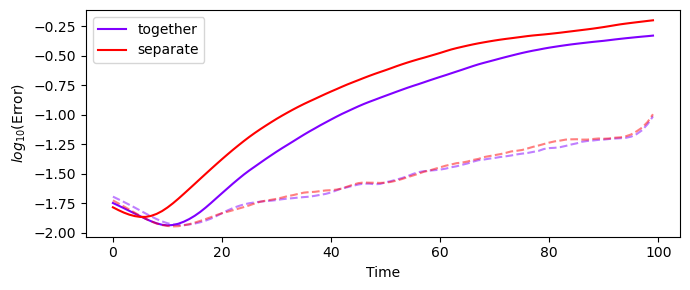

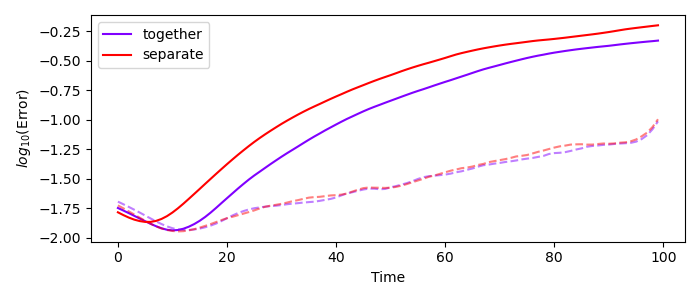

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

KeyError: 'buttons'

In [ ]:
models.WeldHelper.compare_projops([testae, testseparate], ["together", "separate"])

In [ ]:
import models
lconfig = load_config("../autoencoder/configs/experiments/ffnetnormal.yaml")
experimentg = models.TimeInputHelper(lconfig)

FFNet = models.FFNet
test = experimentg.create_timeinput(dset)

test.train_model(500, lr=1e-3)

Number of NN trainable parameters 1404501
Starting training TI model FFNet at Mon Jul  7 09:08:01 2025...
train torch.Size([200, 101, 301]) test (50, 101, 301)
1: Train Loss 1.469e-02, LR 1.000e-03, Relative TI Error (1, 2, inf): 0.323056, 0.397628, 0.737032
11: Train Loss 9.589e-03, LR 1.000e-03, Relative TI Error (1, 2, inf): 0.198969, 0.284285, 0.568798
21: Train Loss 9.558e-03, LR 1.000e-03, Relative TI Error (1, 2, inf): 0.197052, 0.283609, 0.577720
31: Train Loss 9.504e-03, LR 1.000e-03, Relative TI Error (1, 2, inf): 0.198999, 0.281581, 0.570532
41: Train Loss 9.478e-03, LR 1.000e-03, Relative TI Error (1, 2, inf): 0.197673, 0.279596, 0.558994
51: Train Loss 9.285e-03, LR 1.000e-03, Relative TI Error (1, 2, inf): 0.194643, 0.276036, 0.549814
61: Train Loss 8.851e-03, LR 1.000e-03, Relative TI Error (1, 2, inf): 0.185645, 0.267819, 0.545269
71: Train Loss 8.577e-03, LR 1.000e-03, Relative TI Error (1, 2, inf): 0.179298, 0.260338, 0.540709
81: Train Loss 8.111e-03, LR 1.000e-03, R

{'losses': [0.1033051535487175,
  0.0823349580168724,
  0.04372452571988106,
  0.03137320280075073,
  0.022671686485409737,
  0.010263496078550816,
  0.014693018049001694,
  0.016904614865779877,
  0.01645834371447563,
  0.01663331687450409,
  0.016819577664136887,
  0.01585926115512848,
  0.012207738123834133,
  0.012107172049582005,
  0.011922276578843594,
  0.0118312519043684,
  0.011505478993058205,
  0.011055274866521358,
  0.012170922942459583,
  0.01021238137036562,
  0.010254014283418655,
  0.010558195412158966,
  0.01129778753966093,
  0.011243673972785473,
  0.01025031041353941,
  0.011421236209571362,
  0.009926246479153633,
  0.009963621385395527,
  0.009965397417545319,
  0.0108108501881361,
  0.010964985005557537,
  0.009923672303557396,
  0.010983717627823353,
  0.009656084701418877,
  0.009774776175618172,
  0.009716013446450233,
  0.010589463636279106,
  0.010815469548106194,
  0.00983177125453949,
  0.0108338026329875,
  0.009520528838038445,
  0.009666813537478447,
 